In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.drop(['Id','Species'],axis=1,inplace=True)

In [5]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [7]:
df.cov()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,0.685694,-0.039268,1.273682,0.516904
SepalWidthCm,-0.039268,0.188004,-0.321713,-0.117981
PetalLengthCm,1.273682,-0.321713,3.113179,1.296387
PetalWidthCm,0.516904,-0.117981,1.296387,0.582414


In [8]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


## Covariance Manully

In [12]:
def calCovariance(df):
    for i in df.columns:
        for j in df.columns:

            meanI = df[i].mean()
            meanJ = df[j].mean()

            sum = 0
            n = len(df[i])
            
            for val in range(n):
                sum += (df[i].iloc[val] - meanI) * (df[j].iloc[val] - meanJ)
            
            print("covariance of {} and {}".format(i,j))
            print(sum/n)
            
        print()

In [13]:
calCovariance(df)

covariance of SepalLengthCm and SepalLengthCm
0.6811222222222221
covariance of SepalLengthCm and SepalWidthCm
-0.03900666666666666
covariance of SepalLengthCm and PetalLengthCm
1.2651911111111118
covariance of SepalLengthCm and PetalWidthCm
0.5134577777777778

covariance of SepalWidthCm and SepalLengthCm
-0.03900666666666666
covariance of SepalWidthCm and SepalWidthCm
0.1867506666666668
covariance of SepalWidthCm and PetalLengthCm
-0.319568
covariance of SepalWidthCm and PetalWidthCm
-0.11719466666666654

covariance of PetalLengthCm and SepalLengthCm
1.2651911111111118
covariance of PetalLengthCm and SepalWidthCm
-0.319568
covariance of PetalLengthCm and PetalLengthCm
3.092424888888889
covariance of PetalLengthCm and PetalWidthCm
1.2877448888888892

covariance of PetalWidthCm and SepalLengthCm
0.5134577777777778
covariance of PetalWidthCm and SepalWidthCm
-0.11719466666666654
covariance of PetalWidthCm and PetalLengthCm
1.2877448888888892
covariance of PetalWidthCm and PetalWidthCm
0.5

## Correlation Manually

In [14]:
import math
def calCorrelation(df):
    for i in df.columns:
        for j in df.columns:
            n = len(df[i])
            
            sumX  = 0
            for x in df[i]:
                sumX += x
            sumY = 0
            for y in df[j]:
                sumY += y

            sumXY = 0
            for xy in range(n):
                sumXY += (df[i].iloc[xy] * df[j].iloc[xy])
                
            sumX2  = 0
            for x in df[i]:
                sumX2 += (x**2)
            sumY2 = 0
            for y in df[j]:
                sumY2 += (y**2)

            NR = (n * sumXY) - (sumX*sumY)
            DR = math.sqrt( ( (n * sumX2) - (sumX**2))*( (n * sumY2) - (sumY ** 2) ) )

            print("correaltion of {} and {} :".format(i,j))
            print(NR/DR)

In [15]:
calCorrelation(df)

correaltion of SepalLengthCm and SepalLengthCm :
1.0
correaltion of SepalLengthCm and SepalWidthCm :
-0.10936924995067286
correaltion of SepalLengthCm and PetalLengthCm :
0.8717541573048861
correaltion of SepalLengthCm and PetalWidthCm :
0.8179536333691775
correaltion of SepalWidthCm and SepalLengthCm :
-0.10936924995067286
correaltion of SepalWidthCm and SepalWidthCm :
1.0
correaltion of SepalWidthCm and PetalLengthCm :
-0.42051609640118826
correaltion of SepalWidthCm and PetalWidthCm :
-0.3565440896138223
correaltion of PetalLengthCm and SepalLengthCm :
0.8717541573048861
correaltion of PetalLengthCm and SepalWidthCm :
-0.42051609640118826
correaltion of PetalLengthCm and PetalLengthCm :
1.0
correaltion of PetalLengthCm and PetalWidthCm :
0.9627570970509656
correaltion of PetalWidthCm and SepalLengthCm :
0.8179536333691775
correaltion of PetalWidthCm and SepalWidthCm :
-0.3565440896138223
correaltion of PetalWidthCm and PetalLengthCm :
0.9627570970509656
correaltion of PetalWidthCm a

<Axes: >

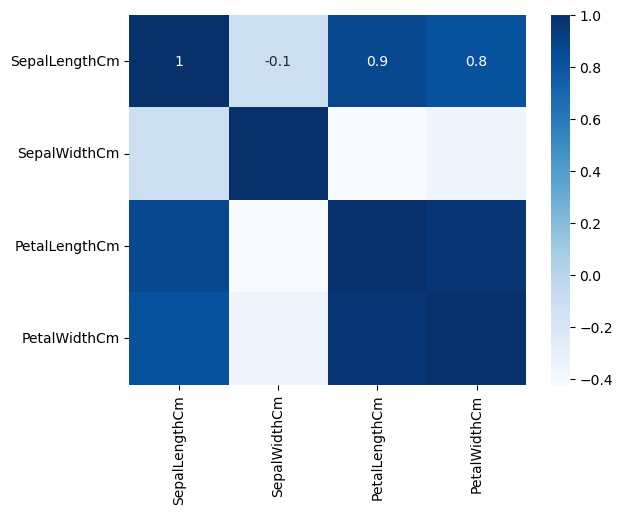

In [20]:
sns.heatmap(df.corr(),annot=True,cmap="Blues", fmt='.1g')